## Setup

In [18]:
!pip install statsmodels --upgrade

     |████████████████████████████████| 9.5MB 5.2MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [150]:
# Generic libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_style('darkgrid')
pd.plotting.register_matplotlib_converters()
# Default figure size
sns.mpl.rc('figure',figsize=(16, 6))

from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.api import acf, pacf, graphics

https://towardsdatascience.com/lets-forecast-your-time-series-using-classical-approaches-f84eb982212c

https://www.statsmodels.org/stable/examples/index.html#time-series-analysis

In [147]:
def plot_prediction(fitted_model, forecast_t, date_range, train_data, test_data, title):
    plt.plot(date_range[-forecast_t:], fitted_model.forecast(forecast_t), color="red", label="pred");
    plt.plot(date_range, np.append(train_data, test_data), color="green", label="true");
    plt.title(title)
    plt.legend();

# Electricity Dataset

## Dataset Load and Preparation

In [3]:
# Note: my Google Drive has been synced with this colab notebook previously
%cd "drive/MyDrive/Máster Big Data (2020-2021)/TFM/Code Notebooks"

/content/drive/MyDrive/Máster Big Data (2020-2021)/TFM/Code Notebooks


In [7]:
#electr_df = pd.read_csv("data/aggr_data/electricity.txt", header=None)
#electr_df['date'] = pd.date_range(start='1/1/2012', periods=electr_df.shape[0], freq="H")
# reorder columns
#cols = electr_df.columns.tolist() 
#cols = cols[-1:] + cols[:-1]
#electr_df = electr_df[cols]
#electr_df.to_csv("data/aggr_data/electr_proc_data.csv") #to later use with library
# showing sample
electr_df = pd.read_csv("data/aggr_data/electr_proc_data.csv", index_col=0)
electr_df

,date,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320
0,2012-01-01 00:00:00,14.0,69.0,234.0,415.0,215.0,1056.0,29.0,840.0,226.0,265.0,179.0,148.0,112.0,171.0,229.0,1001.0,49.0,162.0,594.0,88.0,34.0,885.0,122.0,102.0,425.0,185.0,360.0,83.0,449.0,37.0,408.0,346.0,521.0,177.0,4047.0,151.0,218.0,811.0,112.0,...,2787.0,511.0,159.0,675.0,116.0,76.0,110.0,451.0,292.0,4770.0,123.0,1623.0,234.0,139.0,296.0,2412.0,317.0,16.0,164.0,241.0,575.0,1824.0,89.0,820.0,66.0,847.0,81.0,2002.0,937.0,199.0,676.0,372.0,80100.0,4719.0,5002.0,48.0,38.0,1558.0,182.0,2162.0
1,2012-01-01 01:00:00,18.0,92.0,312.0,556.0,292.0,1363.0,29.0,1102.0,271.0,340.0,235.0,192.0,143.0,213.0,301.0,1223.0,64.0,216.0,758.0,126.0,39.0,1074.0,150.0,127.0,585.0,219.0,451.0,108.0,606.0,60.0,548.0,470.0,632.0,224.0,4684.0,190.0,260.0,950.0,138.0,...,2647.0,517.0,164.0,667.0,128.0,85.0,101.0,606.0,374.0,4189.0,149.0,2065.0,318.0,125.0,334.0,3166.0,385.0,32.0,123.0,318.0,750.0,2418.0,104.0,1268.0,87.0,988.0,91.0,2685.0,866.0,265.0,805.0,452.0,95200.0,4643.0,6617.0,65.0,47.0,2177.0,253.0,2835.0
2,2012-01-01 02:00:00,21.0,96.0,312.0,560.0,272.0,1240.0,29.0,1025.0,270.0,300.0,221.0,171.0,132.0,185.0,261.0,1172.0,61.0,197.0,736.0,115.0,38.0,936.0,149.0,117.0,551.0,193.0,433.0,102.0,616.0,53.0,472.0,452.0,551.0,213.0,4297.0,166.0,259.0,861.0,129.0,...,2535.0,489.0,161.0,649.0,148.0,82.0,84.0,613.0,369.0,4041.0,112.0,1987.0,305.0,123.0,238.0,3194.0,384.0,32.0,123.0,294.0,725.0,2380.0,120.0,1254.0,88.0,942.0,77.0,2661.0,839.0,278.0,817.0,430.0,96600.0,4285.0,6571.0,64.0,43.0,2193.0,218.0,2764.0
3,2012-01-01 03:00:00,20.0,92.0,312.0,443.0,213.0,845.0,24.0,833.0,179.0,211.0,170.0,149.0,116.0,151.0,209.0,813.0,40.0,173.0,661.0,93.0,21.0,833.0,114.0,86.0,434.0,145.0,351.0,78.0,449.0,54.0,375.0,410.0,491.0,170.0,3252.0,114.0,180.0,685.0,128.0,...,2350.0,511.0,166.0,661.0,155.0,76.0,87.0,621.0,369.0,4031.0,115.0,1970.0,305.0,207.0,211.0,3075.0,384.0,24.0,164.0,279.0,725.0,2375.0,119.0,1246.0,87.0,867.0,102.0,2684.0,838.0,271.0,801.0,291.0,94500.0,4222.0,6365.0,65.0,39.0,1315.0,195.0,2735.0
4,2012-01-01 04:00:00,22.0,91.0,312.0,346.0,190.0,647.0,16.0,733.0,186.0,179.0,142.0,170.0,99.0,136.0,148.0,688.0,29.0,144.0,619.0,86.0,20.0,815.0,80.0,73.0,304.0,118.0,289.0,75.0,347.0,44.0,288.0,377.0,479.0,148.0,2639.0,86.0,141.0,623.0,115.0,...,2357.0,524.0,160.0,649.0,121.0,82.0,87.0,622.0,370.0,4056.0,111.0,1971.0,312.0,158.0,212.0,3059.0,388.0,32.0,123.0,259.0,725.0,2367.0,110.0,1212.0,86.0,819.0,103.0,2692.0,828.0,267.0,807.0,279.0,91300.0,4116.0,6298.0,75.0,40.0,1378.0,191.0,2721.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26299,2014-12-31 19:00:00,11.0,116.0,8.0,844.0,384.0,1590.0,51.0,1412.0,407.0,351.0,332.0,163.0,239.0,371.0,403.0,1941.0,64.0,357.0,936.0,174.0,88.0,1782.0,172.0,199.0,593.0,373.0,717.0,136.0,954.0,40.0,930.0,625.0,325.0,378.0,8298.0,306.0,412.0,1016.0,194.0,...,4839.0,705.0,371.0,793.0,607.0,268.0,368.0,878.0,1676.0,10626.0,535.0,3485.0,1199.0,449.0,492.0,7592.0,1546.0,0.0,82.0,799.0,1470.0,4838.0,327.0,1764.0,232.0,2353.0,94.0,5502.0,2065.0,178.0,1897.0,1589.0,166500.0,9917.0,10412.0,324.0,21.0,1870.0,162.0,2773.0
26300,2014-12-31 20:00:00,11.0,103.0,8.0,749.0,371.0,1366.0,47.0,1265.0,369.0,327.0,307.0,160.0,213.0,349.0,361.0,1721.0,61.0,325.0,878.0,171.0,104.0,1614.0,164.0,200.0,554.0,366.0,678.0,125.0,842.0,43.0,741.0,553.0,273.0,332.0,7070.0,275.0,394.0,846.0,185.0,...,2654.0,665.0,185.0,339.0,623.0,93.0,388.0,877.0,1668.0,7884.0,225.0,2930.0,619.0,134.0,218.0,5413.0,1498.

In [158]:
init_t_train = 24*10
end_t_train = init_t_train + 24*8
forecast_t = 24
date_plot = range(init_t_train, end_t_train + forecast_t)

data = electr_df["320"].values

train_data = data[init_t_train:end_t_train]
test_data = data[end_t_train:end_t_train+forecast_t]

## ARIMA

In [159]:
sel = ar_select_order(train_data, 48, old_names=False)
sel.ar_lags
res = sel.model.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  192
Model:                     AutoReg(3)   Log Likelihood               -1163.206
Method:               Conditional MLE   S.D. of innovations            113.931
Date:                Sun, 04 Apr 2021   AIC                              9.524
Time:                        11:33:33   BIC                              9.610
Sample:                             3   HQIC                             9.559
                                  192                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        483.2349     99.928      4.836      0.000     287.379     679.090
y.L1           1.0513      0.070     15.110      0.000       0.915       1.188
y.L2           0.0838      0.103      0.811      0.4

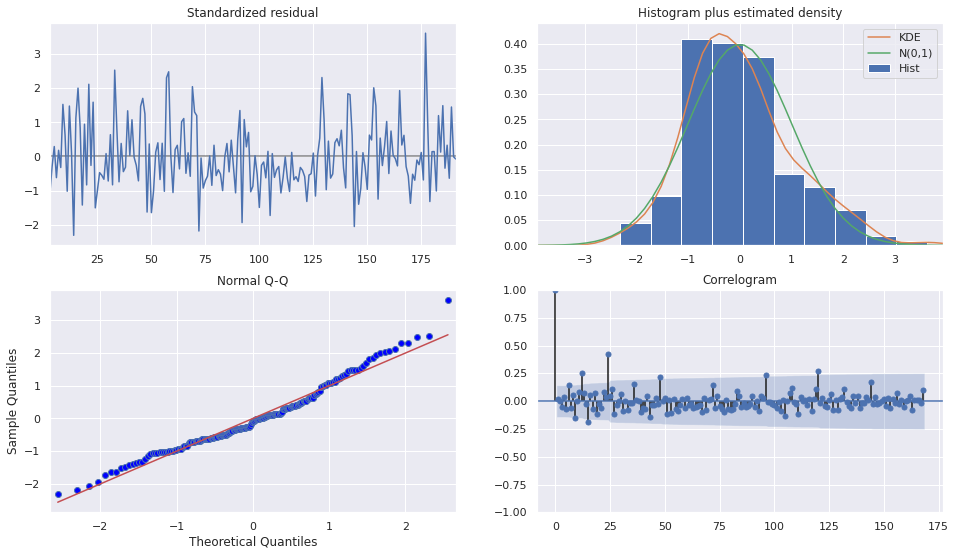

In [160]:
fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(lags=168, fig=fig)

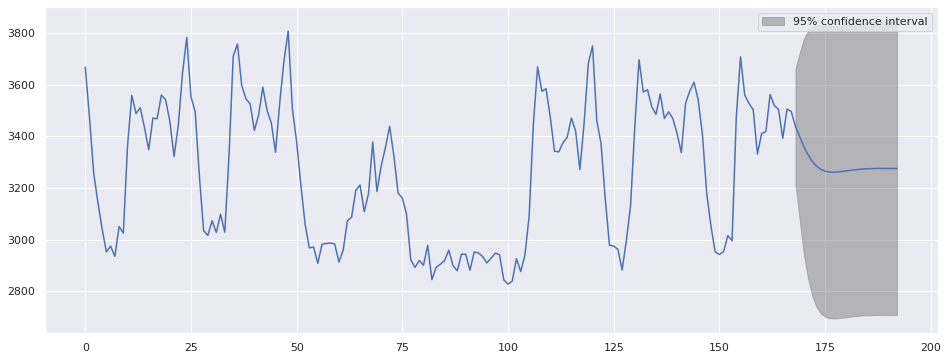

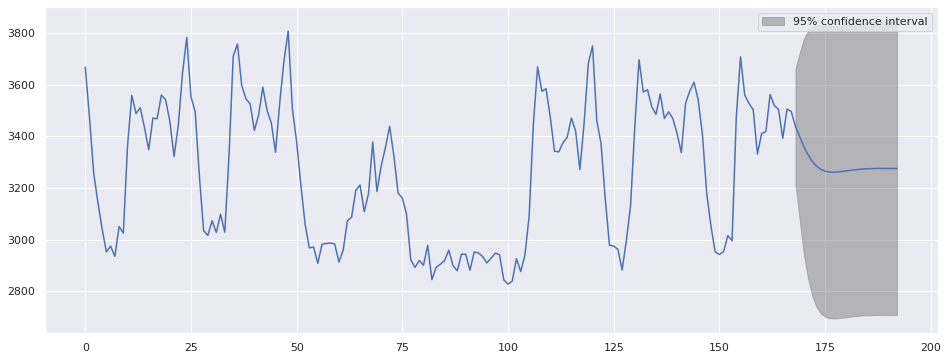

In [162]:
res.plot_predict(len(train_data)-168, len(train_data)+24)

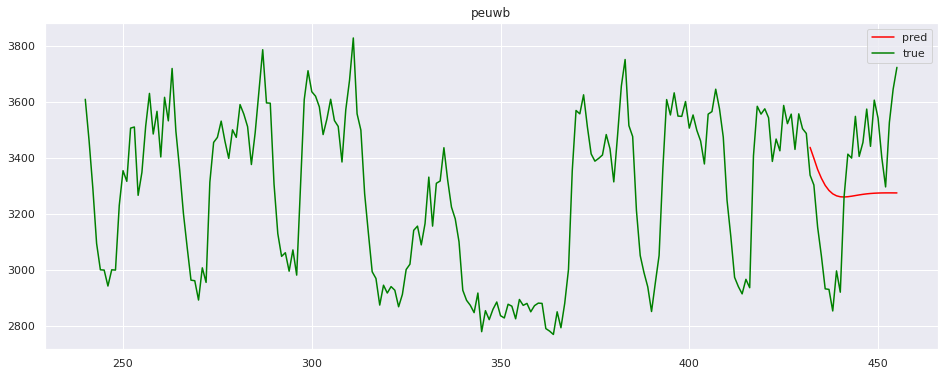

In [163]:
plot_prediction(res, 24, date_plot, train_data, test_data, "peuwb")

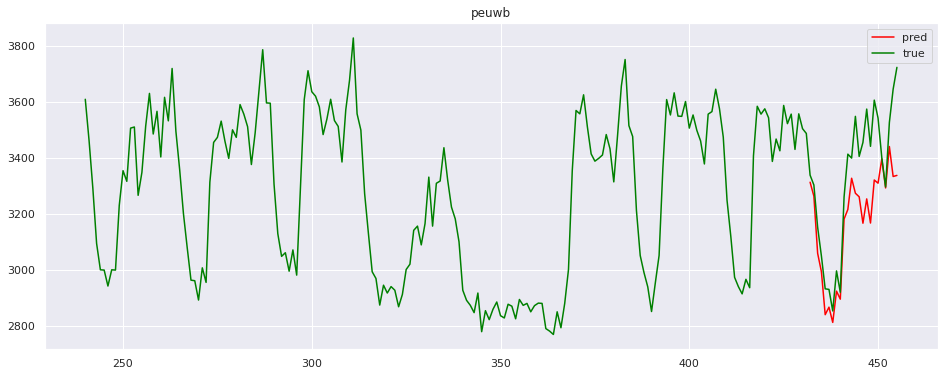

In [166]:
ar24 = AutoReg(train_data, 48, old_names=False).fit()

plot_prediction(ar24, 24, date_plot, train_data, test_data, "peuwb")

## Exponential Smoothing (ETS) Method

In [121]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

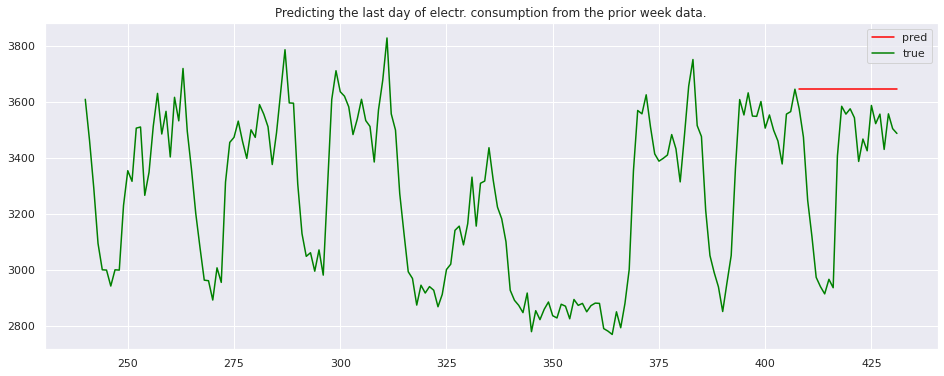

In [148]:
fit = SimpleExpSmoothing(train_data, initialization_method="estimated").fit()

plot_prediction(fit, 24, date_plot, train_data, test_data, 
                "Predicting the last day of electr. consumption from the prior week data.")

In [118]:
fit.summary()

Dep. Variable:,endog,No. Observations:,168
Model:,SimpleExpSmoothing,SSE,2576612.615
Optimized:,True,AIC,1623.188
Trend:,None,BIC,1629.436
Seasonal:,None,AICC,1623.433
Seasonal Periods:,None,Date:,"Sun, 04 Apr 2021"
Box-Cox:,False,Time:,11:03:47
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9950000,alpha,True
initial_level,3449.3333,l.0,True


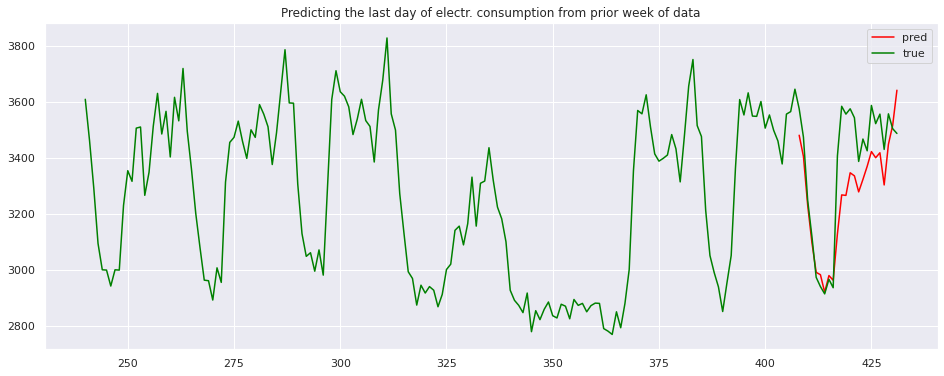

In [149]:
fit2 = ExponentialSmoothing(train_data, seasonal_periods=24, trend='add', seasonal='add', 
                            damped_trend=True, initialization_method="estimated").fit()

plot_prediction(fit2, 24, date_plot, train_data, test_data,
                title="Predicting the last day of electr. consumption from prior week of data")

https://www.statsmodels.org/dev/examples/notebooks/generated/statespace_forecasting.html?highlight=validation#Cross-validation